# Tracking the coronavirus in my neighborhood
### An analysis of neighborhoods in Orange County using data science methodologies
#### Table of Content


##### __[Google Link](https://www.google.com)__ 

##### <a id = "division_ID"> Introduction: Problem and Background </a>
 
 
 [Introduction: Problem and Background](#division_ID)
 
 


In [4]:
pip install matplotlib

In [6]:
pip install altair


Using legacy 'setup.py install' for toolz, since package 'wheel' is not installed.
    Running setup.py install for toolz: started
    Running setup.py install for toolz: finished with status 'done'


In [8]:
pip install folium

  Using cached requests-2.24.0-py2.py3-none-any.whl (61 kB)
  Using cached certifi-2020.6.20-py2.py3-none-any.whl (156 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.25.10-py2.py3-none-any.whl (127 kB)
Note: you may need to restart the kernel to use updated packages.


In [113]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import altair as alt
import folium as folium

In [114]:
ca_covid = pd.read_csv("https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-place-totals.csv")
ca_covid.head()

date  county  fips       place  confirmed_cases note           x  \
0  2020-08-09  Amador   5.0        Ione               36  NaN -120.932778   
1  2020-08-09  Amador   5.0     Jackson               78  NaN -120.774167   
2  2020-08-09  Amador   5.0  Pine Grove               14  NaN -120.658889   
3  2020-08-09  Amador   5.0     Pioneer               12  NaN         NaN   
4  2020-08-09  Amador   5.0    Plymouth                7  NaN         NaN   

           y  
0  38.352778  
1  38.348889  
2  38.413056  
3        NaN  
4        NaN

In [115]:
# Unique County Names
county_name_list = ca_covid['county'].unique()
county_name_list = county_name_list.tolist()
county_name_list.insert(0, 'Select One')
print('Unique County Names: %d' % len(county_name_list))

Unique County Names: 44


In [7]:
county_name = 'Orange'
ca_county = ca_covid[ca_covid['county']== county_name]
ca_county = ca_county.sort_values('date', ascending = True)
ca_county.head()

date  county  fips        place  confirmed_cases note  \
97705  2020-03-27  Orange  59.0  Yorba Linda               10  NaN   
97677  2020-03-27  Orange  59.0  Aliso Viejo                2  NaN   
97678  2020-03-27  Orange  59.0      Anaheim               28  NaN   
97679  2020-03-27  Orange  59.0         Brea                1  NaN   
97680  2020-03-27  Orange  59.0   Buena Park                7  NaN   

                x          y  
97705 -117.834681  33.890894  
97677 -117.726298  33.568460  
97678 -117.889722  33.836111  
97679 -117.900292  33.916475  
97680 -117.998139  33.867404

In [14]:
city_name = 'Irvine'
ca_city = ca_county[ca_county['place']== city_name]
ca_city = ca_city.sort_values('date', ascending = True)
ca_city.head()



date  county  fips   place  confirmed_cases note         x  \
97688  2020-03-27  Orange  59.0  Irvine               33  NaN -117.8436   
97384  2020-03-28  Orange  59.0  Irvine               36  NaN -117.8436   
97072  2020-03-29  Orange  59.0  Irvine               38  NaN -117.8436   
96722  2020-03-30  Orange  59.0  Irvine               43  NaN -117.8436   
96341  2020-03-31  Orange  59.0  Irvine               50  NaN -117.8436   

               y  
97688  33.686502  
97384  33.686502  
97072  33.686502  
96722  33.686502  
96341  33.686502

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


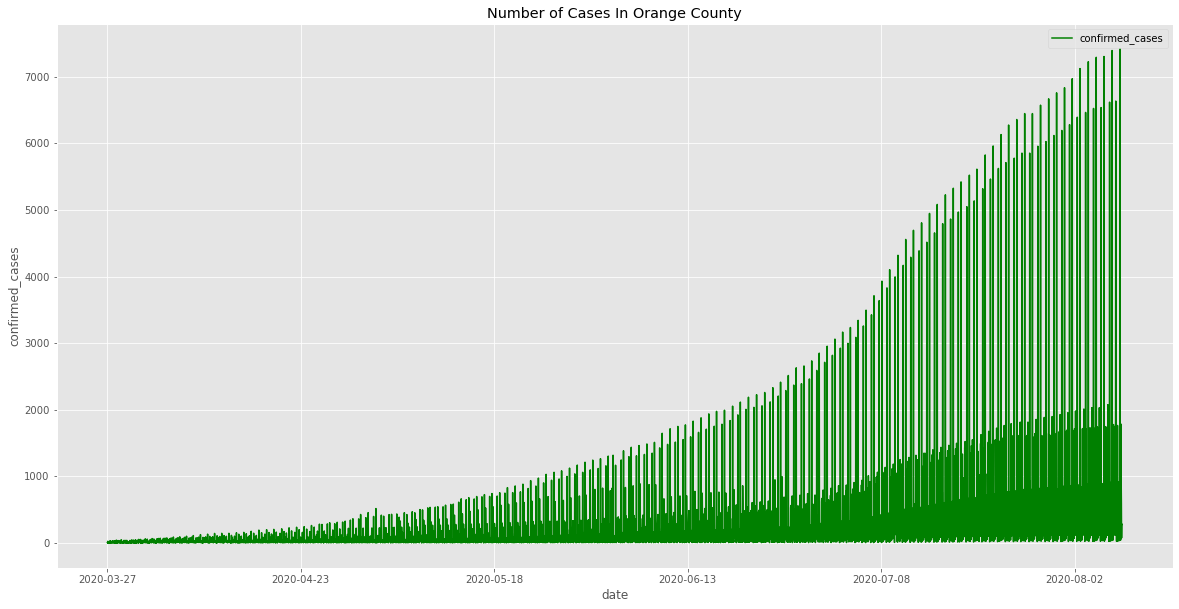

In [13]:
style.use('ggplot')
ax = plt.gca()
df_county.plot(kind='line',x='date',y='confirmed_cases', color='green', ax=ax, figsize=(20,10))
plt.title('Number of Cases In ' + county_name +' County')
plt.xlabel('date')
plt.ylabel('confirmed_cases')
plt.show()

Dropdown(description='county:', index=9, options=('Select One', 'Yolo', 'Alameda', 'Contra Costa', 'Imperial',…

c:\users\sunil\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


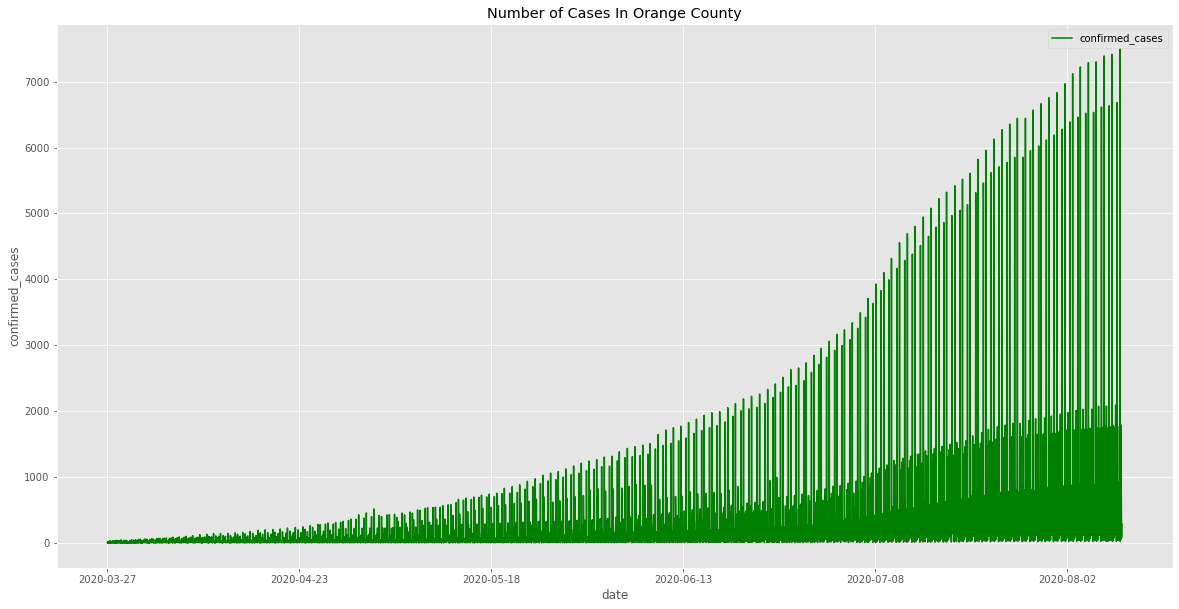

In [6]:
import ipywidgets as widgets
from IPython.display import clear_output

default_county = 'Orange'
country_widget = widgets.Dropdown(
    options= county_name_list,
    value= default_county,
    description='county:',
)

def refresh_chart(county_name):
    # reset plot and widget
    clear_output(wait=True)
    display(country_widget)
    if county_name != 'Select One':
        ca_counties = pd.read_csv("https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/latimes-place-totals.csv")
        ca_county = ca_counties[ca_counties['county'] == county_name]
        ca_county = ca_county.sort_values('date', ascending = True)
        style.use('ggplot')
        ax = plt.gca()
        ca_county.plot(kind='line',x='date',y='confirmed_cases', color='green', ax=ax, figsize=(20,10))
        plt.title('Number of Cases In ' + county_name +' County')
        plt.xlabel('date')
        plt.ylabel('confirmed_cases')
        plt.show()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        refresh_chart(change['new'])
        
country_widget.observe(on_change)
display(country_widget)
refresh_chart(default_county)

In [63]:
ca_covid.head()

date   county   fips            place  confirmed_cases note  \
0  2020-08-09     Yolo  113.0            Davis              179  NaN   
2  2020-08-09     Yolo  113.0  West Sacramento              486  NaN   
3  2020-08-09     Yolo  113.0          Winters               73  NaN   
4  2020-08-09     Yolo  113.0         Woodland              774  NaN   
6  2020-08-08  Alameda    1.0          Alameda              188  NaN   

            x          y  
0 -121.738056  38.553889  
2 -121.530278  38.580556  
3 -121.970833  38.525000  
4 -121.773333  38.678611  
6 -122.274444  37.756111

In [65]:
ca_latest_county = ca_covid[ca_covid['date'] == ca_covid['date'].max()]
del ca_latest_county['date']
del ca_latest_county['confirmed_cases']
ca_latest_county.head()

county   fips            place note           x          y
0   Yolo  113.0            Davis  NaN -121.738056  38.553889
2   Yolo  113.0  West Sacramento  NaN -121.530278  38.580556
3   Yolo  113.0          Winters  NaN -121.970833  38.525000
4   Yolo  113.0         Woodland  NaN -121.773333  38.678611

In [67]:
ca_county.query("confirmed_cases == 'NaN'")

Empty DataFrame
Columns: [date, county, fips, place, confirmed_cases, note, x, y]
Index: []

In [68]:
ca_county.query("x == 'NaN'")

date       county   fips                              place  \
1      2020-08-09         Yolo  113.0                     Unincorporated   
5      2020-08-08      Alameda    1.0                    Address unknown   
9      2020-08-08      Alameda    1.0                      Castro Valley   
14     2020-08-08      Alameda    1.0                           Homeless   
20     2020-08-08      Alameda    1.0                Remainder of county   
...           ...          ...    ...                                ...   
98227  2020-03-24  Los Angeles   37.0                               Pico   
98869  2020-03-18  Los Angeles   37.0  Smaller Los Angeles neighborhoods   
98916  2020-03-17  Los Angeles   37.0  Smaller Los Angeles neighborhoods   
98950  2020-03-16  Los Angeles   37.0  Santa Clarita and Stevenson Ranch   
98954  2020-03-16  Los Angeles   37.0  Smaller Los Angeles neighborhoods   

       confirmed_cases note   x   y  
1                  209  NaN NaN NaN  
5                   86  NaN NaN NaN  
9                  338  NaN NaN NaN  
14                 117  NaN NaN NaN  
20                  19  NaN NaN NaN  
...                ...  ...  ..  ..  
98227                1  NaN NaN NaN  
98869               62  NaN NaN NaN  
98916               27  NaN NaN NaN  
98950                3  NaN NaN NaN  
98954               11  NaN NaN NaN  

[3473 rows x 8 columns]

In [69]:
ca_county.query("y == 'NaN'")

date       county   fips                              place  \
1      2020-08-09         Yolo  113.0                     Unincorporated   
5      2020-08-08      Alameda    1.0                    Address unknown   
9      2020-08-08      Alameda    1.0                      Castro Valley   
14     2020-08-08      Alameda    1.0                           Homeless   
20     2020-08-08      Alameda    1.0                Remainder of county   
...           ...          ...    ...                                ...   
98227  2020-03-24  Los Angeles   37.0                               Pico   
98869  2020-03-18  Los Angeles   37.0  Smaller Los Angeles neighborhoods   
98916  2020-03-17  Los Angeles   37.0  Smaller Los Angeles neighborhoods   
98950  2020-03-16  Los Angeles   37.0  Santa Clarita and Stevenson Ranch   
98954  2020-03-16  Los Angeles   37.0  Smaller Los Angeles neighborhoods   

       confirmed_cases note   x   y  
1                  209  NaN NaN NaN  
5                   86  NaN NaN NaN  
9                  338  NaN NaN NaN  
14                 117  NaN NaN NaN  
20                  19  NaN NaN NaN  
...                ...  ...  ..  ..  
98227                1  NaN NaN NaN  
98869               62  NaN NaN NaN  
98916               27  NaN NaN NaN  
98950                3  NaN NaN NaN  
98954               11  NaN NaN NaN  

[3473 rows x 8 columns]

In [70]:
ca_covid.query("x > 0")

Empty DataFrame
Columns: [date, county, fips, place, confirmed_cases, note, x, y]
Index: []

In [71]:
ca_county.query("date.isnull()", engine='python')

Empty DataFrame
Columns: [date, county, fips, place, confirmed_cases, note, x, y]
Index: []

In [72]:
ca_county = ca_county.query("confirmed_cases != 'NaN' & x < 0 & x != 'NaN' & date.notnull()", engine='python')
ca_county.head()

date   county   fips            place  confirmed_cases note  \
0  2020-08-09     Yolo  113.0            Davis              179  NaN   
2  2020-08-09     Yolo  113.0  West Sacramento              486  NaN   
3  2020-08-09     Yolo  113.0          Winters               73  NaN   
4  2020-08-09     Yolo  113.0         Woodland              774  NaN   
6  2020-08-08  Alameda    1.0          Alameda              188  NaN   

            x          y  
0 -121.738056  38.553889  
2 -121.530278  38.580556  
3 -121.970833  38.525000  
4 -121.773333  38.678611  
6 -122.274444  37.756111

In [73]:
ca_covid = ca_covid.query("confirmed_cases != 'NaN' & x < 0 & x != 'NaN' & date.notnull()", engine='python')
ca_covid.head()

date   county   fips            place  confirmed_cases note  \
0  2020-08-09     Yolo  113.0            Davis              179  NaN   
2  2020-08-09     Yolo  113.0  West Sacramento              486  NaN   
3  2020-08-09     Yolo  113.0          Winters               73  NaN   
4  2020-08-09     Yolo  113.0         Woodland              774  NaN   
6  2020-08-08  Alameda    1.0          Alameda              188  NaN   

            x          y  
0 -121.738056  38.553889  
2 -121.530278  38.580556  
3 -121.970833  38.525000  
4 -121.773333  38.678611  
6 -122.274444  37.756111

In [15]:
ca_city = ca_city.query("confirmed_cases != 'NaN' & x < 0 & x != 'NaN' & date.notnull()", engine='python')
ca_city.head()

date  county  fips   place  confirmed_cases note         x  \
97688  2020-03-27  Orange  59.0  Irvine               33  NaN -117.8436   
97384  2020-03-28  Orange  59.0  Irvine               36  NaN -117.8436   
97072  2020-03-29  Orange  59.0  Irvine               38  NaN -117.8436   
96722  2020-03-30  Orange  59.0  Irvine               43  NaN -117.8436   
96341  2020-03-31  Orange  59.0  Irvine               50  NaN -117.8436   

               y  
97688  33.686502  
97384  33.686502  
97072  33.686502  
96722  33.686502  
96341  33.686502

In [41]:
import requests as r 
import json
from IPython.display import HTML

ca_json = r.get('https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/ca_california_zip_codes_geo.min.json')
print(ca_json)

cali_map = folium.Map(location=[33.669445,-117.823059], zoom_start=12)
folium.Choropleth(geo_data=ca_json.json()['features'][512], 
                     fill_color='red',
                     fill_opacity=0.5,
                     line_opacity=0.8,
                     key_on='feature.properties.ZCTA5CE10').add_to(cali_map)

cali_map.save('plot_data_2.html')
HTML('<iframe src=plot_data_2.html width=800 height=500></iframe>')

<Response [200]>


In [25]:
ca_city.head()

date  county  fips   place  confirmed_cases note         x  \
97688  2020-03-27  Orange  59.0  Irvine               33  NaN -117.8436   
97384  2020-03-28  Orange  59.0  Irvine               36  NaN -117.8436   
97072  2020-03-29  Orange  59.0  Irvine               38  NaN -117.8436   
96722  2020-03-30  Orange  59.0  Irvine               43  NaN -117.8436   
96341  2020-03-31  Orange  59.0  Irvine               50  NaN -117.8436   

               y  
97688  33.686502  
97384  33.686502  
97072  33.686502  
96722  33.686502  
96341  33.686502

In [26]:
ca_city.shape

(134, 8)

In [27]:
ca_city = ca_city.sort_values(by=["date"], ascending=True)
ca_city.tail()

date  county  fips   place  confirmed_cases note         x  \
3959  2020-08-04  Orange  59.0  Irvine             1198  NaN -117.8436   
3071  2020-08-05  Orange  59.0  Irvine             1198  NaN -117.8436   
2163  2020-08-06  Orange  59.0  Irvine             1212  NaN -117.8436   
1291  2020-08-07  Orange  59.0  Irvine             1215  NaN -117.8436   
462   2020-08-08  Orange  59.0  Irvine             1225  NaN -117.8436   

              y  
3959  33.686502  
3071  33.686502  
2163  33.686502  
1291  33.686502  
462   33.686502

In [28]:
ca_city.iloc[0]['date']

'2020-03-27'

In [29]:
lastdate = ca_city.iloc[-1]['date']
lastdate

'2020-08-08'

In [30]:
irvine_single_day = ca_city.query('date==@lastdate')
irvine_single_day

date  county  fips   place  confirmed_cases note         x  \
462  2020-08-08  Orange  59.0  Irvine             1225  NaN -117.8436   

             y  
462  33.686502

In [125]:
orange_single_day = ca_county.query('date==@lastdate')
orange_single_day = orange_single_day.sort_values(by=["confirmed_cases"], ascending=True)
orange_single_day.head()

date  county  fips         place  confirmed_cases note           x  \
455  2020-08-08  Orange  59.0  Coto de Caza               28  NaN -117.587778   
479  2020-08-08  Orange  59.0      Rossmoor               29  NaN         NaN   
484  2020-08-08  Orange  59.0     Silverado               40  NaN         NaN   
488  2020-08-08  Orange  59.0    Villa Park               42  NaN -117.822072   
469  2020-08-08  Orange  59.0  Laguna Woods               42  NaN -117.725116   

             y  
455  33.595833  
479        NaN  
484        NaN  
488  33.814006  
469  33.610170

In [48]:
ca_single_day = ca_covid.query('date==@lastdate')
ca_single_day

date   county   fips                    place  confirmed_cases  \
5    2020-08-08  Alameda    1.0          Address unknown               86   
6    2020-08-08  Alameda    1.0                  Alameda              188   
7    2020-08-08  Alameda    1.0                   Albany               32   
8    2020-08-08  Alameda    1.0                 Berkeley              408   
9    2020-08-08  Alameda    1.0            Castro Valley              338   
..          ...      ...    ...                      ...              ...   
687  2020-08-08     Yolo  113.0                 Woodland              774   
688  2020-08-08     Yuba  115.0               Marysville              272   
689  2020-08-08     Yuba  115.0         Olivehurst/Linda              215   
690  2020-08-08     Yuba  115.0                    Other               44   
691  2020-08-08     Yuba  115.0  Plumas Lake & Wheatland               69   

    note           x          y  
5    NaN         NaN        NaN  
6    NaN -122.274444  37.756111  
7    NaN -122.297778  37.886944  
8    NaN -122.272778  37.871667  
9    NaN         NaN        NaN  
..   ...         ...        ...  
687  NaN -121.773333  38.678611  
688  NaN -121.583333  39.150000  
689  NaN -121.550833  39.127778  
690  NaN         NaN        NaN  
691  NaN -121.558056  39.020833  

[687 rows x 8 columns]

In [49]:
ca_single_day = ca_single_day.query("confirmed_cases != 'NaN' & x < 0 & x != 'NaN' & date.notnull()", engine='python')
ca_single_day.head()

date   county  fips       place  confirmed_cases note           x  \
6   2020-08-08  Alameda   1.0     Alameda              188  NaN -122.274444   
7   2020-08-08  Alameda   1.0      Albany               32  NaN -122.297778   
8   2020-08-08  Alameda   1.0    Berkeley              408  NaN -122.272778   
10  2020-08-08  Alameda   1.0      Dublin              139  NaN -121.935833   
11  2020-08-08  Alameda   1.0  Emeryville               52  NaN -122.285278   

            y  
6   37.756111  
7   37.886944  
8   37.871667  
10  37.702222  
11  37.831389

In [31]:
ca_city = ca_city.query("place=='Irvine'")
ca_city

date  county  fips   place  confirmed_cases note         x  \
97688  2020-03-27  Orange  59.0  Irvine               33  NaN -117.8436   
97384  2020-03-28  Orange  59.0  Irvine               36  NaN -117.8436   
97072  2020-03-29  Orange  59.0  Irvine               38  NaN -117.8436   
96722  2020-03-30  Orange  59.0  Irvine               43  NaN -117.8436   
96341  2020-03-31  Orange  59.0  Irvine               50  NaN -117.8436   
...           ...     ...   ...     ...              ...  ...       ...   
3959   2020-08-04  Orange  59.0  Irvine             1198  NaN -117.8436   
3071   2020-08-05  Orange  59.0  Irvine             1198  NaN -117.8436   
2163   2020-08-06  Orange  59.0  Irvine             1212  NaN -117.8436   
1291   2020-08-07  Orange  59.0  Irvine             1215  NaN -117.8436   
462    2020-08-08  Orange  59.0  Irvine             1225  NaN -117.8436   

               y  
97688  33.686502  
97384  33.686502  
97072  33.686502  
96722  33.686502  
96341  33.686502  
...          ...  
3959   33.686502  
3071   33.686502  
2163   33.686502  
1291   33.686502  
462    33.686502  

[134 rows x 8 columns]

In [116]:
ca_covid.confirmed_cases.describe()

count    99635.000000
mean       206.505164
std        518.796033
min          1.000000
25%         11.000000
50%         45.000000
75%        172.000000
max      14083.000000
Name: confirmed_cases, dtype: float64

In [33]:
ca_covid.groupby("county").confirmed_cases.describe()

count        mean         std   min     25%    50%     75%  \
county                                                                          
Alameda           2194.0  226.615770  554.130036   1.0   19.00   60.0  174.00   
Amador             447.0    6.559284    9.863437   1.0    1.00    3.0    7.00   
Butte              297.0   66.760943  110.511618   3.0   10.00   20.0   65.00   
Calaveras          115.0   10.939130   11.335619   1.0    3.00    5.0   15.00   
Contra Costa      3375.0  103.144000  197.698563   1.0   18.00   42.0   90.50   
El Dorado          621.0   26.560386   50.360619   1.0    4.00    8.0   23.00   
Fresno            1635.0  162.322936  587.553401   1.0   12.00   35.0  116.00   
Humboldt            84.0   49.107143   54.007143   3.0    8.00   24.5   83.50   
Imperial          1171.0  322.546541  623.149766   1.0    9.00   55.0  277.00   
Kern              3477.0  165.433420  327.733455   1.0    4.00   38.0  171.00   
Kings              539.0  253.259740  324.361832   1.0   47.00  135.0  295.00   
Long Beach         935.0  313.225668  322.722936  14.0  105.00  205.0  406.00   
Los Angeles      41459.0  225.318556  467.888053   1.0   12.00   55.0  216.00   
Madera              75.0  360.920000  310.498151  58.0  120.50  204.0  560.50   
Marin             2056.0   71.292802  251.902205   1.0    1.00   10.5   34.00   
Mendocino          269.0   30.542751   54.400284   1.0    3.00    8.0   33.00   
Merced             669.0  117.659193  214.616035   6.0   13.00   41.0  116.00   
Mono               171.0   26.508772   34.327894   1.0    2.00   12.0   35.00   
Monterey           412.0  425.274272  612.986086   8.0   54.00  200.0  435.25   
Napa              1093.0   25.030192   69.172582   1.0    2.00    3.0   14.00   
Nevada             471.0   15.851380   28.284181   1.0    1.00    1.0   19.00   
Orange            5287.0  280.021373  723.347876   1.0   24.00   66.0  222.00   
Placer             309.0  233.223301  385.142517  11.0   24.00   85.0  195.00   
Plumas             123.0    4.934959    4.086643   1.0    1.00    3.0    8.00   
Riverside         6525.0  184.673257  444.954927   1.0   10.00   37.0  147.00   
Sacramento         943.0  409.067869  963.626684   1.0   44.00  122.0  343.50   
San Bernardino    5156.0  246.100272  577.517297   1.0    6.00   30.0  192.00   
San Diego         5151.0  258.358377  989.534059   1.0    6.00   27.0  132.50   
San Francisco     2578.0  119.972071  169.158551   1.0   27.00   58.0  133.00   
San Joaquin        431.0  277.116009  727.439888   1.0   29.50   68.0  207.00   
San Luis Obispo   1376.0   40.686773   66.025130   1.0    9.00   16.0   38.00   
San Mateo          670.0   84.002985  173.659633   1.0    1.00   15.0   71.25   
Santa Barbara     1171.0  184.328779  406.573865   1.0   15.00   43.0  117.00   
Santa Clara       1727.0  265.590620  815.741110   1.0   24.00   64.0  134.00   
Santa Cruz         419.0   84.109785  108.104027   5.0   22.50   48.0   97.00   
Solano             666.0  153.375375  270.515554   1.0   11.00   36.0  156.50   
Sonoma             475.0  169.770526  277.503670  13.0   22.00   61.0  188.00   
Stanislaus        1159.0  198.589301  418.923650   1.0   13.00   52.0  168.00   
Sutter              54.0  242.555556  243.250292  52.0   73.25   86.0  471.00   
Tulare             846.0  153.710402  254.242157   1.0   13.00   55.0  168.50   
Ventura           1727.0  119.123914  196.970105   1.0    7.00   38.0  149.50   
Yolo               530.0  117.137736  156.458640   4.0   24.00   64.0  125.00   
Yuba                76.0  109.842105   75.637566  22.0   42.75   85.5  167.75   

                     max  
county                    
Alameda           5085.0  
Amador              77.0  
Butte              568.0  
Calaveras           49.0  
Contra Costa      1845.0  
El Dorado          353.0  
Fresno            9051.0  
Humboldt           183.0  
Imperial          2981.0  
Kern              3288.0  
Kings             1617.0  
Long Beach        2000

In [34]:
ca_covid.groupby("county").confirmed_cases.describe().sort_values(by=["max"], ascending=False)

count        mean         std   min     25%    50%     75%  \
county                                                                          
San Diego         5151.0  258.358377  989.534059   1.0    6.00   27.0  132.50   
Fresno            1635.0  162.322936  587.553401   1.0   12.00   35.0  116.00   
Los Angeles      41459.0  225.318556  467.888053   1.0   12.00   55.0  216.00   
Santa Clara       1727.0  265.590620  815.741110   1.0   24.00   64.0  134.00   
Orange            5287.0  280.021373  723.347876   1.0   24.00   66.0  222.00   
Sacramento         943.0  409.067869  963.626684   1.0   44.00  122.0  343.50   
San Joaquin        431.0  277.116009  727.439888   1.0   29.50   68.0  207.00   
San Bernardino    5156.0  246.100272  577.517297   1.0    6.00   30.0  192.00   
Riverside         6525.0  184.673257  444.954927   1.0   10.00   37.0  147.00   
Alameda           2194.0  226.615770  554.130036   1.0   19.00   60.0  174.00   
Stanislaus        1159.0  198.589301  418.923650   1.0   13.00   52.0  168.00   
Kern              3477.0  165.433420  327.733455   1.0    4.00   38.0  171.00   
Monterey           412.0  425.274272  612.986086   8.0   54.00  200.0  435.25   
Santa Barbara     1171.0  184.328779  406.573865   1.0   15.00   43.0  117.00   
Imperial          1171.0  322.546541  623.149766   1.0    9.00   55.0  277.00   
Marin             2056.0   71.292802  251.902205   1.0    1.00   10.5   34.00   
Long Beach         935.0  313.225668  322.722936  14.0  105.00  205.0  406.00   
Contra Costa      3375.0  103.144000  197.698563   1.0   18.00   42.0   90.50   
Placer             309.0  233.223301  385.142517  11.0   24.00   85.0  195.00   
Tulare             846.0  153.710402  254.242157   1.0   13.00   55.0  168.50   
Merced             669.0  117.659193  214.616035   6.0   13.00   41.0  116.00   
Sonoma             475.0  169.770526  277.503670  13.0   22.00   61.0  188.00   
Kings              539.0  253.259740  324.361832   1.0   47.00  135.0  295.00   
Ventura           1727.0  119.123914  196.970105   1.0    7.00   38.0  149.50   
Solano             666.0  153.375375  270.515554   1.0   11.00   36.0  156.50   
San Mateo          670.0   84.002985  173.659633   1.0    1.00   15.0   71.25   
Madera              75.0  360.920000  310.498151  58.0  120.50  204.0  560.50   
San Francisco     2578.0  119.972071  169.158551   1.0   27.00   58.0  133.00   
Yolo               530.0  117.137736  156.458640   4.0   24.00   64.0  125.00   
Sutter              54.0  242.555556  243.250292  52.0   73.25   86.0  471.00   
Santa Cruz         419.0   84.109785  108.104027   5.0   22.50   48.0   97.00   
Napa              1093.0   25.030192   69.172582   1.0    2.00    3.0   14.00   
Butte              297.0   66.760943  110.511618   3.0   10.00   20.0   65.00   
San Luis Obispo   1376.0   40.686773   66.025130   1.0    9.00   16.0   38.00   
El Dorado          621.0   26.560386   50.360619   1.0    4.00    8.0   23.00   
Mendocino          269.0   30.542751   54.400284   1.0    3.00    8.0   33.00   
Yuba                76.0  109.842105   75.637566  22.0   42.75   85.5  167.75   
Humboldt            84.0   49.107143   54.007143   3.0    8.00   24.5   83.50   
Nevada             471.0   15.851380   28.284181   1.0    1.00    1.0   19.00   
Mono               171.0   26.508772   34.327894   1.0    2.00   12.0   35.00   
Amador             447.0    6.559284    9.863437   1.0    1.00    3.0    7.00   
Calaveras          115.0   10.939130   11.335619   1.0    3.00    5.0   15.00   
Plumas             123.0    4.934959    4.086643   1.0    1.00    3.0    8.00   

                     max  
county                    
San Diego        14083.0  
Fresno            9051.0  
Los Angeles       8775.0  
Santa Clara       7717.0  
Orange            7496.0  
Sacramento        6741.0  
San Joaquin       5847.0  
San Bernardino    5583.0  
Riverside         5550.0  
Alameda           5085.0  
Stanislaus        3297.0  
Kern              3288

In [35]:
ca_county.groupby("place").confirmed_cases.describe().sort_values(by=["max"], ascending=False).head(50)

count         mean          std    min     25%  \
place                                                                    
Santa Ana               134.0  2233.000000  2345.613375   13.0  339.00   
Anaheim                 134.0  2035.582090  2116.337844   28.0  323.50   
Garden Grove            134.0   623.149254   650.897894    4.0  101.50   
Orange                  134.0   535.500000   565.014508   11.0   86.00   
Fullerton               134.0   505.462687   575.581637    7.0   75.25   
Huntington Beach        134.0   589.477612   551.300605   26.0  216.25   
Costa Mesa              134.0   331.283582   409.353619    8.0   38.50   
Irvine                  134.0   387.619403   379.607411   33.0  127.75   
Buena Park              134.0   336.298507   334.214443    7.0   77.25   
Other/unknown            69.0   453.043478   307.945251   52.0   87.00   
La Habra                134.0   256.940299   291.738805    1.0   47.25   
Tustin                  134.0   249.813433   288.630866    4.0   39.00   
Newport Beach           134.0   286.656716   270.429986   32.0   97.00   
Other*                    2.0   832.000000    41.012193  803.0  817.50   
Westminster             134.0   222.925373   224.220475    5.0   40.75   
Placentia               134.0   216.194030   217.715151    5.0   53.00   
Lake Forest             134.0   165.731343   200.348687    5.0   28.25   
Mission Viejo           134.0   174.656716   193.070641    6.0   42.50   
Unknown                   8.0   237.250000   265.434818   34.0   45.50   
Yorba Linda             133.0   161.345865   159.246761   10.0   49.00   
Stanton                 133.0   137.428571   145.968048    1.0   27.00   
Cypress                 134.0   126.283582   122.733565    6.0   42.00   
Other                     9.0   148.333333   184.482384   15.0   16.00   
Fountain Valley         134.0   115.828358   118.567105    5.0   31.25   
Brea                    134.0    99.634328   115.454808    1.0   20.00   
San Clemente            134.0   112.365672    98.893391   10.0   45.50   
Laguna Niguel           134.0    89.500000    91.345724   11.0   32.00   
San Juan Capistrano     134.0    87.917910    82.925190    9.0   24.75   
Aliso Viejo             133.0    80.744361    93.361358    2.0   18.00   
Rancho Santa Margarita  134.0    69.231343    83.832084    3.0   14.00   
Laguna Hills            131.0    71.320611    72.561196    1.0   22.00   
Seal Beach              134.0    69.343284    73.184914    1.0   11.00   
Dana Point              134.0    58.335821    58.931073    6.0   22.00   
Los Alamitos            119.0    81.747899    47.070488    1.0   41.00   
Trabuco Canyon          126.0    45.119048    51.672911    5.0   11.00   
Laguna Beach            131.0    61.923664    33.836625   22.0   37.00   
La Palma                131.0    41.076336    37.851454    6.0   14.00   
Ladera Ranch            128.0    37.554688    39.021054    6.0   12.00   
Midway City             104.0    32.413462    22.871787    5.0   12.00   
Other/Unknown            10.0    63.500000     5.254628   55.0   60.00   
Rancho Mission Viejo    115.0    18.469565    15.672818    5.0    6.00   
Laguna Woods            125.0    16.848000    12.125058    1.0    8.00   
Villa Park              124.0    16.008065    13.596685    1.0    6.00   
Silverado                34.0    29.352941    12.254578    8.0   16.00   
Rossmoor                 53.0    22.773585     6.018055   12.0   18.00   
Coto de Caza            118.0    10.135593     7.013924    5.0    5.00   
Corona Del Mar            1.0    12.000000          NaN   12.0   12.00   

                           50%      75%     max  
place                                            
Santa Ana               1286.5  3456.75  7496.0  
Anaheim                 1140.0  3215.25  6682.0  
Garden Grove             361.5   933.75  2094.0  
Orange                   288.5   807.00  1793.0  
Fullerton                219.5   765.75  1771.0  
Huntington Beach         350.5   857.75  1753.0

In [38]:
!pip install plotly

Using legacy 'setup.py install' for retrying, since package 'wheel' is not installed.
    Running setup.py install for retrying: started
    Running setup.py install for retrying: finished with status 'done'


In [108]:
import plotly.express as px
Irvine = ca_covid.query("place == ['Irvine']")
px.bar(Irvine,
      x='date',
      y='confirmed_cases')

In [118]:
OC_Cities = ca_county.query("place == ['Santa Ana','Anaheim','Irvine']")
px.bar(OC_Cities,
      x='date',
      y='confirmed_cases',
      color = 'place')

In [95]:
px.scatter(orange_single_day,
           x='x',
           y='y',
           hover_name='place',
           color='confirmed_cases')

In [50]:
px.scatter(ca_single_day,
           x='x',
           y='y',
           hover_name='place',
           color='confirmed_cases')

In [51]:
px.scatter(ca_single_day,
           x='x',
           y='y',
           color='confirmed_cases', 
           size='confirmed_cases',
           size_max=40, 
           hover_name='place',
           title = 'Confirmed Cases for ' + lastdate)

In [119]:
px.scatter(ca_single_day,
           x='x',
           y='y',
           color='confirmed_cases', 
           size='confirmed_cases',
           size_max=40, 
           hover_name='place',
           color_continuous_scale = 'RdYlGn_r') # added _r to reverse color scheme

In [53]:
ca_single_day_mean = ca_single_day.confirmed_cases.mean()
ca_single_day_mean

620.2244582043344

In [55]:
px.scatter(ca_single_day,
           x='x',
           y='y',
           color='confirmed_cases', 
           size='confirmed_cases',
           size_max=40, 
           hover_name='place',
           color_continuous_scale = 'RdYlGn_r', # added _r to reverse color scheme
           range_color = (0,ca_single_day_mean * 2) # double the mean
          )

In [57]:
orange_mean = ca_county.confirmed_cases.mean()
orange_mean

280.0213731794969

In [58]:
px.scatter(ca_county,
           x='x',
           y='y',
           color='confirmed_cases', 
           size='confirmed_cases',
           size_max=40, 
           hover_name='place',
           animation_frame='date', # this creates a frame by frame animation by day
           color_continuous_scale = 'RdYlGn_r',
           range_color = (0,orange_mean*2))

In [60]:
fig = px.scatter_geo(ca_single_day,
           lon='x',
           lat='y',
           color='confirmed_cases', 
           size='confirmed_cases',
           size_max=40, 
           hover_name='place',
           scope='usa',
           color_continuous_scale = 'RdYlGn_r',
           range_color = (0,ca_single_day_mean * 2) # double the mean 
            )

fig.update_geos(fitbounds="locations") 

In [120]:
fig = px.scatter_geo(ca_county,
           lon='x',
           lat='y',
           color='confirmed_cases', 
           size='confirmed_cases',
           size_max=40, 
           hover_name='place',
           scope='usa',                     
           animation_frame='date',
           color_continuous_scale = 'RdYlGn_r',
           range_color = (0,orange_mean*2))

fig.update_geos(fitbounds="locations") 

In [71]:
# Set the map up
map_orange = folium.Map(location=[33.6846, -117.8265],
                        tiles = "Stamen Toner",
                        zoom_start = 9)
# Simple marker
folium.Marker([33.6846, -117.8265],
              popup='Irvine',
              icon=folium.Icon(color='green')
             ).add_to(map_orange)

# Circle marker
folium.CircleMarker([33.6846, -117.8265],
                    radius=30,
                    popup='Irvine',
                    color='red',
                    ).add_to(map_orange)

# Interactive marker
map_orange.add_child(folium.ClickForMarker(popup="Irvine"))

map_orange


In [81]:
locations = ca_county[['x', 'y']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[-117.698912, 33.467458]

In [84]:
# Create a Map instance
map = folium.Map(location=[34,-118], 
               zoom_start=8, 
               control_scale=True
                )

map

In [85]:
# Create a Map instance with different basemap
map = folium.Map(location=[34,-118], 
               zoom_start=8, 
               control_scale=True,
               tiles='CartoDB dark_matter',
               attr= '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>')
map

In [86]:
# add a circle
my_circle = folium.Circle(
    radius=10000, # this is in meters
    location=[34,-118],
    color='crimson',
    fill=True,
)
my_circle.add_to(map)
map

<AxesSubplot:xlabel='x', ylabel='y'>

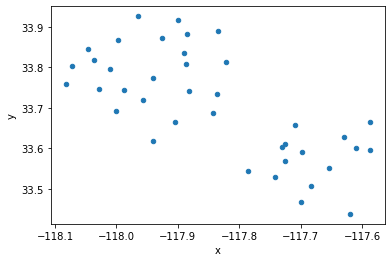

In [92]:
orange_single_day.plot(x ='x', y='y', kind = 'scatter')

In [140]:
orange_single_day = orange_single_day.query("confirmed_cases != 'NaN' & x < 0 & x != 'NaN' & date.notnull()", engine='python')
orange_single_day.head()

date  county  fips                 place  confirmed_cases note  \
455  2020-08-08  Orange  59.0          Coto de Caza               28  NaN   
488  2020-08-08  Orange  59.0            Villa Park               42  NaN   
469  2020-08-08  Orange  59.0          Laguna Woods               42  NaN   
477  2020-08-08  Orange  59.0  Rancho Mission Viejo               46  NaN   
472  2020-08-08  Orange  59.0           Midway City               81  NaN   

              x          y  
455 -117.587778  33.595833  
488 -117.822072  33.814006  
469 -117.725116  33.610170  
477 -117.610000  33.600000  
472 -117.987000  33.744700

In [99]:
# loop through the rows in Los Angeles, and create a circle based on confirmed cases
for index, row in orange_single_day.iterrows():
    # set up the variables
    lat = row['y']
    lon = row['x']
    label = str(row['confirmed_cases']) + ' confirmed cases in ' + row['place']
    size = row['confirmed_cases']
    
    # create a circle for every row
    circle = folium.Circle(
        radius=size,
        location=[lat,lon],
        tooltip = label,
        color='crimson',
        fill = True
    )
    circle.add_to(map)
# show the map
map

In [100]:
import altair as alt

In [101]:
# reset the map (only way to get rid of circles)
map = folium.Map(location=[34,-118], 
                zoom_start=8, 
                control_scale=True,
                tiles='CartoDB dark_matter',
                attr= '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>')

In [102]:
# create a function to create circles, and also add a chart in the popup window (a lot here, will break it up later)
def createCircle(lat,lon,size,place,label):
    # create a bar chart for each circle
    bar = alt.Chart(ca_county.query('place == @place')).mark_bar().encode(
        x=alt.X('date', axis=alt.Axis(labels=False)), # turn the labels off because there are too many
        y='confirmed_cases',
        color='confirmed_cases',
        tooltip = ['date','place','confirmed_cases']
    ).properties(width=400,height=200)

    # add the bar chart as a folium feature
    vega = folium.features.VegaLite(
        bar,
        width=600,
        height=200,
    )

    # create the circle
    circle = folium.Circle(
        radius=size,
        location=[lat,lon],
        tooltip = label,
        color='crimson',
        fill = True
    )

    # create a popup
    popup = folium.Popup()

    # add the chart to the popup
    vega.add_to(popup)
    
    # add the popup to the circle
    popup.add_to(circle)
    
    # add the circle to the map
    circle.add_to(map)
    

In [103]:
# loop through the rows in Los Angeles, and create a circle based on confirmed cases
for index, row in orange_single_day.iterrows():
    label = str(row['confirmed_cases']) + ' confirmed cases in ' + row['place']
    createCircle(row['y'],row['x'],row['confirmed_cases'],row['place'],label)

In [104]:
# show the map
map

In [105]:
# save it!
map.save('index.html')

In [141]:
orange_single_day.head()

date  county  fips                 place  confirmed_cases note  \
455  2020-08-08  Orange  59.0          Coto de Caza               28  NaN   
488  2020-08-08  Orange  59.0            Villa Park               42  NaN   
469  2020-08-08  Orange  59.0          Laguna Woods               42  NaN   
477  2020-08-08  Orange  59.0  Rancho Mission Viejo               46  NaN   
472  2020-08-08  Orange  59.0           Midway City               81  NaN   

              x          y  
455 -117.587778  33.595833  
488 -117.822072  33.814006  
469 -117.725116  33.610170  
477 -117.610000  33.600000  
472 -117.987000  33.744700

In [111]:
orange_single_day.tail()

date  county  fips                place  confirmed_cases note  \
474  2020-08-08  Orange  59.0        Newport Beach              917  NaN   
473  2020-08-08  Orange  59.0        Mission Viejo              598  NaN   
472  2020-08-08  Orange  59.0          Midway City               81  NaN   
481  2020-08-08  Orange  59.0  San Juan Capistrano              291  NaN   
450  2020-08-08  Orange  59.0          Aliso Viejo              284  NaN   

              x          y  
474 -117.940778  33.617990  
473 -117.730609  33.602000  
472 -117.987000  33.744700  
481 -117.683894  33.506334  
450 -117.726298  33.568460

c:\users\sunil\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



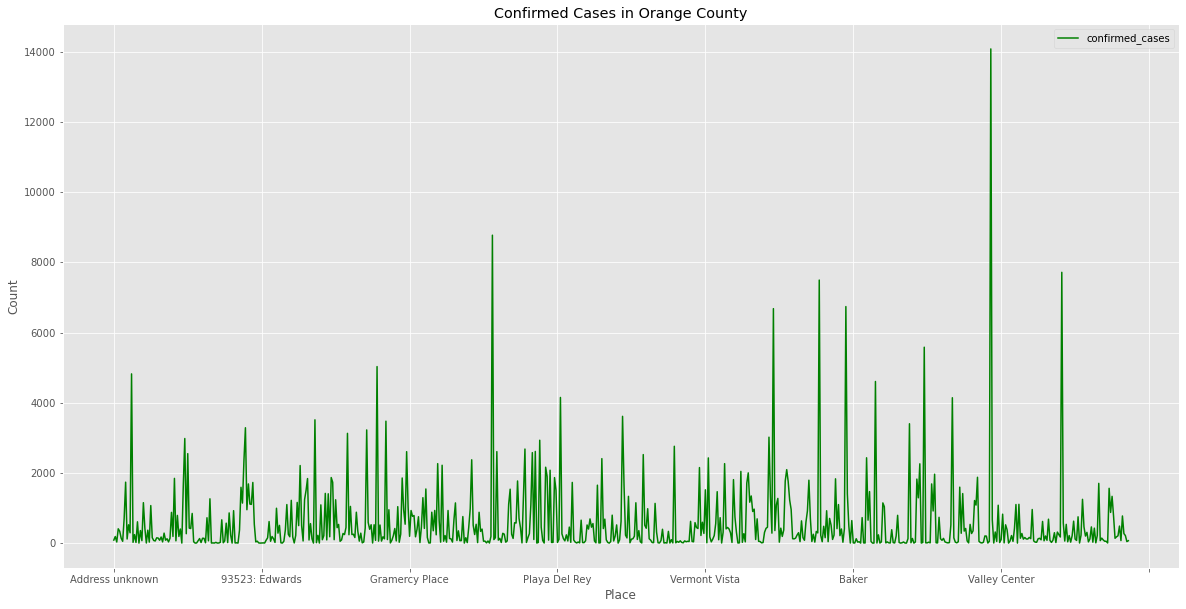

In [163]:
style.use('ggplot')
ax = plt.gca()
orange_single_day.plot(kind='line',x='place',y='confirmed_cases', color='green', ax=ax, figsize=(20,10))

plt.title('Confirmed Cases in Orange County')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()

In [151]:
ca_county = ca_county.query("confirmed_cases != 'NaN' & x < 0 & x != 'NaN' & date.notnull()", engine='python')
ca_county.head()

date  county  fips        place  confirmed_cases note  \
97705  2020-03-27  Orange  59.0  Yorba Linda               10  NaN   
97677  2020-03-27  Orange  59.0  Aliso Viejo                2  NaN   
97678  2020-03-27  Orange  59.0      Anaheim               28  NaN   
97679  2020-03-27  Orange  59.0         Brea                1  NaN   
97680  2020-03-27  Orange  59.0   Buena Park                7  NaN   

                x          y  
97705 -117.834681  33.890894  
97677 -117.726298  33.568460  
97678 -117.889722  33.836111  
97679 -117.900292  33.916475  
97680 -117.998139  33.867404